## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = mouse_metadata.merge(study_results, how='outer')
# Display the data table for preview
mouse_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
total_mice = len(mouse_data['Mouse ID'].unique())
print(f"There are a total of {total_mice} unique mice in the study - the total dataset includes {len(mouse_data['Mouse ID'])} entries")

There are a total of 249 unique mice in the study - the total dataset includes 1893 entries


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_entry = mouse_data.loc[mouse_data.duplicated(["Mouse ID","Timepoint"]), :]
duplicate_entry_ids = duplicate_entry['Mouse ID']
duplicate_mouse_id = duplicate_entry_ids.unique()[0]
duplicate_mouse_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_entry

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_data.loc[mouse_data["Mouse ID"] != duplicate_mouse_id, :]
mouse_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(mouse_data['Mouse ID'].unique())
print(f"There are a total of {total_mice} unique mice in the study - the total dataset includes {len(mouse_data['Mouse ID'])} entries")

There are a total of 248 unique mice in the study - the total dataset includes 1880 entries


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_mean_by_drug_regime = mouse_data.groupby(['Drug Regimen']) \
    .mean()['Tumor Volume (mm3)'] 
tumor_volume_median_by_drug_regime = mouse_data.groupby(['Drug Regimen']) \
    .median()['Tumor Volume (mm3)'] 
tumor_volume_variance_by_drug_regime = mouse_data.groupby(['Drug Regimen']) \
    .var()['Tumor Volume (mm3)'] 
tumor_volume_sem_by_drug_regime = mouse_data.groupby(['Drug Regimen']) \
    .sem()['Tumor Volume (mm3)'] 

summary_stats = pd.DataFrame({
        'mean': tumor_volume_mean_by_drug_regime,
        'median': tumor_volume_median_by_drug_regime,
        'variance': tumor_volume_variance_by_drug_regime,
        'sem': tumor_volume_sem_by_drug_regime
})
summary_stats

mean     median   variance       sem
Drug Regimen                                           
Capomulin     40.675741  41.557809  24.947764  0.329346
Ceftamin      52.591172  51.776157  39.290177  0.469821
Infubinol     52.884795  51.820584  43.128684  0.492236
Ketapril      55.235638  53.698743  68.553577  0.603860
Naftisol      54.331565  52.509285  66.173479  0.596466
Placebo       54.033581  52.288934  61.168083  0.581331
Propriva      52.320930  50.446266  43.852013  0.544332
Ramicane      40.216745  40.673236  23.486704  0.320955
Stelasyn      54.233149  52.431737  59.450562  0.573111
Zoniferol     53.236507  51.818479  48.533355  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'sem']})

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

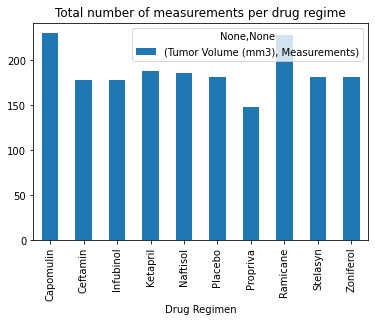

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mouse_data.groupby(['Drug Regimen']) \
    .aggregate({'Tumor Volume (mm3)': ['count']}) \
    .reset_index()\
    .rename(columns={'count': 'Measurements'}) \
    .plot('Drug Regimen', kind='bar', title='Total number of measurements per drug regime',)


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

total_measurements_per_drug_regime = mouse_data.groupby(['Drug Regimen']) \
    .count()[['Timepoint']] \
    .rename(columns={'Timepoint': 'Measurements'}) \
    .reset_index()
plt.bar(total_measurements_per_drug_regime['Drug Regimen'], total_measurements_per_drug_regime['Measurements'], )
plt.title('Total number of measurements per drug regime')
plt.tick_params(labelrotation=90)
plt.legend('Measurements')
plt.ylabel('Measurements')

Text(0, 0.5, 'Measurements')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DD231DBE0>],
      dtype=object)

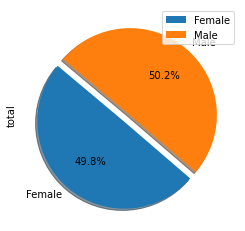

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_mice = mouse_metadata.groupby('Sex') \
    .count()[['Mouse ID']] \
    .rename(columns={'Mouse ID': 'total'})

male_female_mice.plot('total',kind='pie', subplots=True, explode=(0.1, 0), shadow=True, startangle=140, autopct="%1.1f%%")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female_mice['total'], explode=(0.1, 0), autopct="%1.1f%%", labels=list(male_female_mice.index), shadow=True, startangle=140)
plt.legend(list(male_female_mice.index))

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_subset = mouse_data.loc[
    (mouse_data['Drug Regimen'] == 'Capomulin') |
    (mouse_data['Drug Regimen'] == 'Ramicane') |
    (mouse_data['Drug Regimen'] == 'Infubinol') |
    (mouse_data['Drug Regimen'] == 'Ceftamin')
    , :
]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_last_timepoint = drug_subset.groupby('Drug Regimen').max()
tumor_volume_last_timepoint = tumor_volume_last_timepoint[['Timepoint']].reset_index()

tumor_volume_subset = mouse_data.merge(tumor_volume_last_timepoint, how='inner', left_on=['Drug Regimen', 'Timepoint'], right_on=['Drug Regimen', 'Timepoint'])
tumor_volume_subset.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16         45   
1     g791     Ramicane  Male          11          16         45   
2     s508     Ramicane  Male           1          17         45   
3     m546     Ramicane  Male          18          16         45   
4     z578     Ramicane  Male          11          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           22.050126                 1  
1           29.128472                 1  
2           30.276232                 0  
3           30.564625                 1  
4           30.638696                 0

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    tumor_vol_data.append(tumor_volume_subset.loc[(tumor_volume_subset['Drug Regimen'] == treatment)]['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(ncols=len(treatments), sharex=True, sharey=True)
for entry in range(len(treatments)):
    ax[entry].boxplot(tumor_vol_data[entry])
    ax[entry].set_xlabel(treatments[entry])
ax[2].set_title('Final tumor volume of each mouse across four regimens')
ax[0].set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

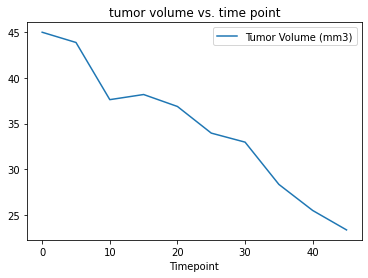

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mouse_data.loc[(mouse_data['Drug Regimen'] == 'Capomulin'), :][['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]
mice0 = capomulin_data['Mouse ID'].unique()[0]
mice0_capomulin_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mice0, :]
mice0_capomulin_data.plot('Timepoint', 'Tumor Volume (mm3)', kind='line', title='tumor volume vs. time point')

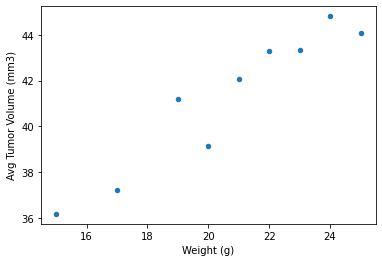

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_avg_tumor_vol = capomulin_data.groupby('Weight (g)') \
    .mean() \
    .rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})[['Avg Tumor Volume (mm3)']]
mouse_weight_avg_tumor_vol = mouse_weight_avg_tumor_vol.reset_index()
mouse_weight_avg_tumor_vol.plot('Weight (g)', 'Avg Tumor Volume (mm3)', kind='scatter')

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between Weight and Avg Tumor Volume is 0.95
R^2: 0.903


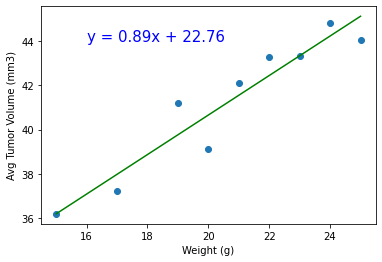

In [19]:
x_values = mouse_weight_avg_tumor_vol['Weight (g)']
y_values = mouse_weight_avg_tumor_vol['Avg Tumor Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between Weight and Avg Tumor Volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq, (16, 44), fontsize=15, color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"R^2: {rvalue**2:.3f}")
plt.show()